In [1]:
using DifferentialEquations
using Plots
using LinearAlgebra
import ForwardDiff
import DiffResults
using AstrodynamicsBase
using Printf
using JSON
using CSV
using DataFrames
using LaTeXStrings
LaTeXStrings

LaTeXStrings

In [82]:
include("../src/SailorMoon.jl")   # relative path to main file of module
param3b = SailorMoon.dynamics_parameters()
gr()
fs = 13


┌ Warning: Replacing docs for `Main.SailorMoon.integrate_rk4 :: Union{Tuple{ODEProblem, Real}, Tuple{ODEProblem, Real, Union{Nothing, Vector}}, Tuple{ODEProblem, Real, Union{Nothing, Vector}, Bool}, Tuple{ODEProblem, Real, Union{Nothing, Vector}, Bool, Bool}}` in module `Main.SailorMoon`
└ @ Base.Docs docs\Docs.jl:240


13

In [83]:
filename = "../run/data/grid_search_Tsit5_0613_velThrust.csv"
filename2 = "../run/data/grid_search_Tsit5_0609_NoThrust.csv"

df  = CSV.read(filename, DataFrame);
df2 = CSV.read(filename2, DataFrame);

p = plot(
    size=(400,500), frame_style=:square, grid=0.4, legend=false, 
    xlims=[0, 2*pi], ylims=[50,120],
    xlabel=L"\theta_{m0}, \textrm{rad}", 
    ylabel=L"TOF, days",
    colorbar_titlefontsize=fs,
    fontsize=fs, xlabelfontsize=fs, ylabelfontsize=fs, xtickfontsize=fs-1, ytickfontsize=fs-1, legendfontsize=fs-1
);

p1 = plot(
    size=(500,500), frame_style=:square, grid=0.4, legend=false, 
    xlims=[0, 2*pi], ylims=[50,120],
    xlabel=L"\theta_{m0}, \textrm{rad}", 
    ylabel=L"TOF, days",
    colorbar_titlefontsize=fs,
    fontsize=fs, xlabelfontsize=fs, ylabelfontsize=fs, xtickfontsize=fs-1, ytickfontsize=fs-1, legendfontsize=fs-1
);



In [84]:
function interpolatecolor(value, vmin, vmax, cs=:viridis)
    cs = cgrad(cs)
    color = cs[(value - vmin) / (vmax - vmin)]
    return color
end

interpolatecolor (generic function with 2 methods)

29950.474628792726 3012.218944954669



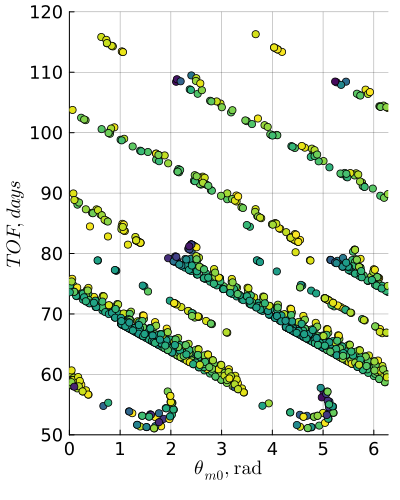

In [85]:
tof     = df.tof .* param3b.tstar / 86640
thetasf = df.thetasf
thetamf = pi .- thetasf
thetam0 = thetamf .- df.tof .* param3b.oml
thetam0 = [mod2pi(el) for el in thetam0] 

rp    = df.rp_kep  .* param3b.lstar
rp2   = df2.rp_kep  .* param3b.lstar
rpmax = maximum(vcat(rp, rp2)) 
rpmin = minimum(vcat(rp, rp2)) 

println(rpmax, " ", rpmin)

println()
# scatter!(p, thetam0, tof, c=rp)


for (id, rp_) in enumerate(rp)
    c = interpolatecolor(rp_, rpmin, rpmax)
#     println(thetam0[id])
    scatter!(p, [thetam0[id]], [tof[id]], c=c)
end

p


29950.474628792726 3012.218944954669


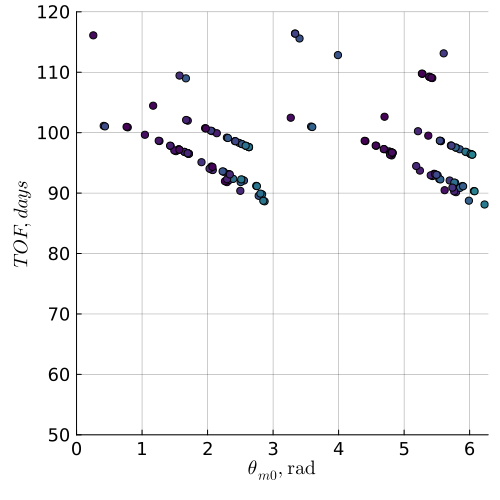

In [86]:
tof     = df2.tof .* param3b.tstar / 86640
thetasf = df2.thetasf
thetamf = pi .- thetasf
thetam0 = thetamf .- df2.tof .* param3b.oml
thetam0 = [mod2pi(el) for el in thetam0] 

println(rpmax, " ", rpmin)

for (id, rp_) in enumerate(rp2)
    c = interpolatecolor(rp_, rpmin, rpmax)
#     println(thetam0[id])
    scatter!(p1, [thetam0[id]], [tof[id]], c=c)
end

p1

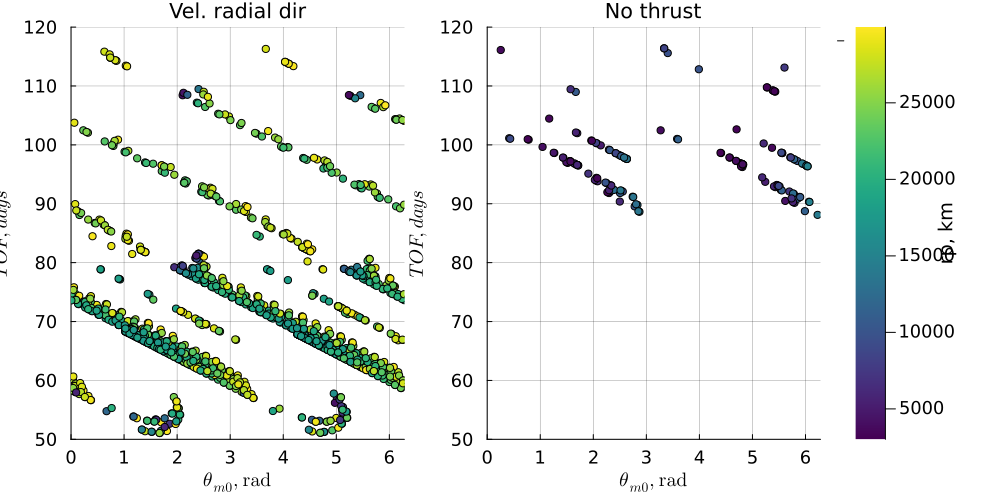

GKS: Rectangle definition is invalid in routine SET_VIEWPORT


In [91]:
l = @layout [a{0.45w} b{0.45w} c{0.05w}]

cs = :viridis
p2 = heatmap(rand(2,2), clims=(rpmin, rpmax),
    framestyle=:none, c=cs, cbar=true, lims=(-1,0), colorbar_title="rp, km",
    colorbar_titlefontsize=fs,
    fontsize=fs, xlabelfontsize=fs, ylabelfontsize=fs, xtickfontsize=fs-1, ytickfontsize=fs-1, legendfontsize=fs-1)


plot(p, p1, p2, layout=l, size=(1000,500), 
#     top_margin=5Plots.mm,
#     right_margin=5Plots.mm,
#     left_margin=5Plots.mm, 
    bottom_margin=5Plots.mm, 
    title=["Vel. radial dir" "No thrust" ""])
